# Bitcoin Price Prediction

Based on [Ethereum (ETH) Price Prediction using Machine Learning (SVR) & Python](https://www.youtube.com/watch?v=HiDEAWdAif0) from [Computer Science](https://www.youtube.com/channel/UCbmb5IoBtHZTpYZCDBOC1CA)

**Disclaimer:** _Investing in the stock market involves risk and can lead to monetary loss. This material is purely for educational purposes and should not be taken as professional investment advice. Invest at your own discretion._

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [2]:
plt.style.use('fivethirtyeight')

Load the Bitcoin data

In [3]:
df = pd.read_csv("BTC.csv")

Set the date as index

In [4]:
df = df.set_index(pd.DatetimeIndex(df['Date']))

Show the data

In [5]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2021-01-01,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,40730301359,0,0
2021-01-02,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,67865420765,0,0
2021-01-03,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,78665235202,0,0
2021-01-04,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,81163475344,0,0
2021-01-05,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,67547324782,0,0
...,...,...,...,...,...,...,...,...
2021-05-09,2021-05-09,58877.390625,59210.882812,56482.003906,58232.316406,65906690347,0,0
2021-05-10,2021-05-10,58250.871094,59519.355469,54071.457031,55859.796875,71776546298,0,0
2021-05-11,2021-05-11,55847.242188,56872.542969,54608.652344,56704.574219,61308396325,0,0


In [6]:
future_days = 5

Create a new column

In [7]:
df[str(future_days)+"_Day_Price_Forecast"] = df[['Close']].shift(-future_days)

Show the data

In [8]:
df[['Close', str(future_days)+"_Day_Price_Forecast"]]

,Close,5_Day_Price_Forecast
Date,,
2021-01-01,29374.152344,36824.363281
2021-01-02,32127.267578,39371.042969
2021-01-03,32782.023438,40797.609375
2021-01-04,31971.914062,40254.546875
2021-01-05,33992.429688,38356.441406
...,...,...
2021-05-09,58232.316406,NaN
2021-05-10,55859.796875,NaN
2021-05-11,56704.574219,NaN


In [9]:
X = np.array(df[['Close']])

In [10]:
X = X[:df.shape[0] - future_days]

In [11]:
X

array([[29374.15234375],
       [32127.26757812],
       [32782.0234375 ],
       [31971.9140625 ],
       [33992.4296875 ],
       [36824.36328125],
       [39371.04296875],
       [40797.609375  ],
       [40254.546875  ],
       [38356.44140625],
       [35566.65625   ],
       [33922.9609375 ],
       [37316.359375  ],
       [39187.328125  ],
       [36825.3671875 ],
       [36178.140625  ],
       [35791.27734375],
       [36630.07421875],
       [36069.8046875 ],
       [35547.75      ],
       [30825.69921875],
       [33005.76171875],
       [32067.64257812],
       [32289.37890625],
       [32366.39257812],
       [32569.84960938],
       [30432.546875  ],
       [31649.60546875],
       [34316.38671875],
       [34269.5234375 ],
       [33114.359375  ],
       [33537.17578125],
       [35510.2890625 ],
       [37472.08984375],
       [36926.06640625],
       [38144.30859375],
       [39266.01171875],
       [38903.44140625],
       [46196.46484375],
       [46481.10546875],


In [12]:
y = np.array(df[str(future_days)+"_Day_Price_Forecast"])

In [13]:
y = y[:-future_days]

In [14]:
y

array([36824.36328125, 39371.04296875, 40797.609375  , 40254.546875  ,
       38356.44140625, 35566.65625   , 33922.9609375 , 37316.359375  ,
       39187.328125  , 36825.3671875 , 36178.140625  , 35791.27734375,
       36630.07421875, 36069.8046875 , 35547.75      , 30825.69921875,
       33005.76171875, 32067.64257812, 32289.37890625, 32366.39257812,
       32569.84960938, 30432.546875  , 31649.60546875, 34316.38671875,
       34269.5234375 , 33114.359375  , 33537.17578125, 35510.2890625 ,
       37472.08984375, 36926.06640625, 38144.30859375, 39266.01171875,
       38903.44140625, 46196.46484375, 46481.10546875, 44918.18359375,
       47909.33203125, 47504.8515625 , 47105.515625  , 48717.2890625 ,
       47945.05859375, 49199.87109375, 52149.0078125 , 51679.796875  ,
       55888.1328125 , 56099.51953125, 57539.9453125 , 54207.3203125 ,
       48824.42578125, 49705.33203125, 47093.8515625 , 46339.76171875,
       46188.453125  , 45137.76953125, 49631.2421875 , 48378.98828125,
      

Split the data

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [17]:
from sklearn.svm import SVR

In [18]:
params = {
    "C": [1.1e4, 1.12e4, 1.14e4, 1.18e4, 1.2e4, 1.22e4, 1.24e4, 1.26e4, 1.28e4, 1.3e4],
    "kernel": ['rbf'],
    "gamma": [1e-6, 1e-7, 1e-8, 1e-9, 1e-10],
}

In [19]:
grid_search_svr = GridSearchCV(
    SVR(), params
)

In [20]:
grid_search_svr.fit(x_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [11000.0, 11200.0, 11400.0, 11800.0, 12000.0,
                               12200.0, 12400.0, 12600.0, 12800.0, 13000.0],
                         'gamma': [1e-06, 1e-07, 1e-08, 1e-09, 1e-10],
                         'kernel': ['rbf']})

In [21]:
print("best_score: ", grid_search_svr.best_score_)

best_score:  0.8251429890742795


In [22]:
print("best_params: ", grid_search_svr.best_params_)

best_params:  {'C': 12200.0, 'gamma': 1e-08, 'kernel': 'rbf'}


In [23]:
svr_rbf = grid_search_svr.best_estimator_

In [24]:
svr_rbf.fit(x_train, y_train)

SVR(C=12200.0, gamma=1e-08)

In [25]:
svr_rbf_confidendce = svr_rbf.score(x_test, y_test)

In [26]:
svr_rbf_confidendce

0.2888679619552944

In [27]:
svm_predicition = svr_rbf.predict(x_test)

In [28]:
svm_predicition

array([57448.40718867, 57440.5486384 , 51661.0564453 , 50395.66599233,
       36014.71254653, 56974.67387174, 57527.1235123 , 36596.18777193,
       34847.81191098, 57574.62234497, 57325.88283903, 57509.92223885,
       34806.51775198, 57200.10618113, 57370.40999895, 56353.04093308,
       54483.30324063, 54917.92380111, 57583.56607428, 57876.26583827,
       57416.46139245, 35003.18953917, 54064.64704454, 57230.54446776,
       57046.62078222, 55293.90045873])

In [29]:
print(y)

[36824.36328125 39371.04296875 40797.609375   40254.546875
 38356.44140625 35566.65625    33922.9609375  37316.359375
 39187.328125   36825.3671875  36178.140625   35791.27734375
 36630.07421875 36069.8046875  35547.75       30825.69921875
 33005.76171875 32067.64257812 32289.37890625 32366.39257812
 32569.84960938 30432.546875   31649.60546875 34316.38671875
 34269.5234375  33114.359375   33537.17578125 35510.2890625
 37472.08984375 36926.06640625 38144.30859375 39266.01171875
 38903.44140625 46196.46484375 46481.10546875 44918.18359375
 47909.33203125 47504.8515625  47105.515625   48717.2890625
 47945.05859375 49199.87109375 52149.0078125  51679.796875
 55888.1328125  56099.51953125 57539.9453125  54207.3203125
 48824.42578125 49705.33203125 47093.8515625  46339.76171875
 46188.453125   45137.76953125 49631.2421875  48378.98828125
 50538.2421875  48561.16796875 48927.3046875  48912.3828125
 51206.69140625 52246.5234375  54824.1171875  56008.55078125
 57805.12109375 57332.08984375 612

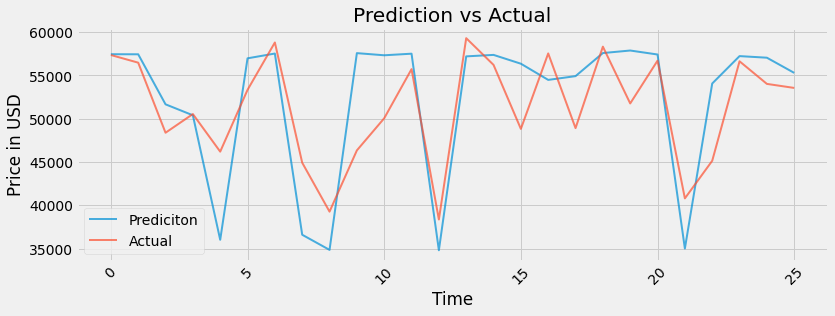

In [30]:
plt.figure(figsize=(12,4))
plt.plot(svm_predicition, label="Prediciton", lw=2, alpha=0.7)
plt.plot(y_test, label="Actual", lw=2, alpha=0.7)
plt.title("Prediction vs Actual")
plt.ylabel("Price in USD")
plt.xlabel("Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()

**THIS IS NOT AN INVESTMENT ADVICE!**